# Does the Borough and Ethnicity a student belongs to affect their overall SAT score in NYC

## Introduction 
With the use of high school data compiled from the New York City Department of Education, and the SAT score averages and testing rates provided by the College Board, we analyse and discuss whether the Borough and Ethnicity a student belongs to affect their overall SAT score in NYC. SAT scores are standardized tests taken by the college board (an independent board) that are used by students to apply for college after highschool. The score a child gets greatly impacts his/her chance in getting into college and their future. Though the new SAT tests have changed their format to 1600 points (Math: 800, Reading: 400, Writing: 400), however, we will be using data from the older format which gives us almost the same results (Math: 800, Reading: 800, Writing: 800). The main emphasis of this project is to find connections in whether some boroughs or highschools in New York City do better than others and discuss the factors that lead to these differences. Finding differences would be extremely interesting as one can infer how getting into certain public highschools or going for schooling in certain areas of the city would impact the college a child gets into. 


Our data is very comprehensive, and to answer our question: (Y Variable) SAT score a child receives, we will use different variables. One of our variable (X_1) will be the differnt boroughs i.e. Manhattan, Queens, while (X_2) will be the different ethinic groups. With the use of these variables we will try to develop an analysis on whether the borough you live in around NYC would give certain students a natural advantage. 

In [37]:
import pandas as pd
import qeds
import geopandas as gpd
import seaborn as sns
import json
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
from shapely import wkt
from shapely.geometry import Point
from IPython.display import display
import ssl
import matplotlib.pyplot as plt
ssl._create_default_https_context = ssl._create_unverified_context

First we are Reading the data and creating a dataframe 'df' and then running our dataframe. 

In [2]:
df = pd.read_csv(r"C:\Users\Anwar Malik\Desktop\UofT\Year 2\ECO225\ECO225Project\Data\scores.csv")
df

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 pm,87.0,3.40%,21.80%,67.80%,4.60%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 pm,1735.0,28.60%,13.30%,18.00%,38.50%,657.0,601.0,601.0,91.00%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 pm,358.0,11.70%,38.50%,41.30%,5.90%,395.0,411.0,387.0,78.90%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 pm,383.0,3.10%,28.20%,56.90%,8.60%,418.0,428.0,415.0,65.10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 pm,381.0,2.10%,49.10%,43.60%,4.20%,372.0,362.0,352.0,44.60%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 pm,368.0,14.70%,46.70%,30.20%,3.50%,357.0,381.0,376.0,38.50%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 pm,683.0,10.70%,53.20%,29.10%,6.00%,427.0,430.0,423.0,76.60%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 pm,397.0,3.80%,52.60%,33.50%,5.00%,399.0,403.0,405.0,46.50%


## Data Cleaning
To start our analysis we need to do certain steps to clean our data and convert it into something that we will find easier to interpret. Since we care about SAT scores and the distribution of different ethnic groups in each high school, we will need to clean this data and remove the '%' sign and convert all percentages and SAT scores in to float. 

In the cell below we clean the data remove the '%' sign from the data. Using string methods we removed the percentage sign. 

In [3]:
df2 = df.replace('%','',regex=True)

In [4]:
df2

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 pm,87.0,3.40,21.80,67.80,4.60,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 pm,1735.0,28.60,13.30,18.00,38.50,657.0,601.0,601.0,91.00
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 pm,358.0,11.70,38.50,41.30,5.90,395.0,411.0,387.0,78.90
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 pm,383.0,3.10,28.20,56.90,8.60,418.0,428.0,415.0,65.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 pm,381.0,2.10,49.10,43.60,4.20,372.0,362.0,352.0,44.60
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 pm,368.0,14.70,46.70,30.20,3.50,357.0,381.0,376.0,38.50
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 pm,683.0,10.70,53.20,29.10,6.00,427.0,430.0,423.0,76.60
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 pm,397.0,3.80,52.60,33.50,5.00,399.0,403.0,405.0,46.50


Our emphasis is to determine whether certain boroughs may have higher SAT scores, as a result, we calulate the percentage of each borough in our data.

In [5]:
df2['Borough'].value_counts()

Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: Borough, dtype: int64

In [6]:
df2['Borough'].value_counts(normalize= True)

Brooklyn         0.278161
Bronx            0.271264
Manhattan        0.243678
Queens           0.183908
Staten Island    0.022989
Name: Borough, dtype: float64

We will now remove any rows that contain missing data. This will allow us to interpret our data much easily when we run our analysis. 

In [7]:
df2.dropna()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 pm,1735.0,28.60,13.30,18.00,38.50,657.0,601.0,601.0,91.00
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 pm,358.0,11.70,38.50,41.30,5.90,395.0,411.0,387.0,78.90
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 pm,383.0,3.10,28.20,56.90,8.60,418.0,428.0,415.0,65.10
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 pm,416.0,1.70,3.10,5.50,88.90,613.0,453.0,463.0,95.90
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 pm,255.0,3.90,24.40,56.60,13.20,410.0,406.0,381.0,59.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 pm,381.0,2.10,49.10,43.60,4.20,372.0,362.0,352.0,44.60
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 pm,368.0,14.70,46.70,30.20,3.50,357.0,381.0,376.0,38.50
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 pm,683.0,10.70,53.20,29.10,6.00,427.0,430.0,423.0,76.60
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 pm,397.0,3.80,52.60,33.50,5.00,399.0,403.0,405.0,46.50


Converting all our new variables that are without the % sign to floats since they were previosuly as strings. We also make a new variable 'Non-White' which includes the Black, Hispanic and Asian population. 

In [8]:
df2['Percent White'] = df2['Percent White'].astype(float)
df2['Percent Black'] = df2['Percent Black'].astype(float)
df2['Percent Hispanic'] = df2['Percent Hispanic'].astype(float)
df2['Percent Asian'] = df2['Percent Asian'].astype(float)
df2['Non-White'] = df2['Percent Black'] +  df2['Percent Hispanic'] + df2['Percent Asian']
df2['Percent Tested'] = df2['Percent Tested'].astype(float)

## Summary Statistics 
Part of our analysis is to determine whether certain boroughs have lower SAT scores than others. An important inferance we hope to make is whether regions with higher immigrated or non-white populations might be at a disadvantage and getting lower SAT scores. The reasons could be poor infrastructure, lack of resources and equal opportunities. Hence, we will analyse and create a summary statistics.

As a result, we will use the data we have of percentage of each populations and the average SAT scores to see whether there is correlation between a borrough with a high white population and a low white population. 

In [9]:
df2['Total Average SAT Score'] = df2['Average Score (SAT Math)'] + df2['Average Score (SAT Reading)'] + df2['Average Score (SAT Writing)']

In [10]:
Manhattan_SAT = ['Manhattan']
df_manhattan = df2[df2['Borough'].isin(Manhattan_SAT)]
df_manhattan.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Non-White,Total Average SAT Score
count,106.000000,106.000000,106.000000,102.000000,102.000000,102.000000,102.000000,102.000000,89.000000,89.000000,89.000000,90.000000,102.000000,89.000000
mean,10023.556604,40.764047,-73.976734,589.156863,10.120588,25.436275,51.417647,10.707843,455.887640,444.932584,439.314607,70.943333,87.561765,1340.134831
std,31.004172,0.043197,0.025167,482.711519,13.676614,14.617457,20.959520,14.545059,83.818315,73.930987,76.387707,17.804835,14.854516,230.294140
min,10001.000000,40.690790,-74.019760,87.000000,0.000000,0.000000,2.600000,0.000000,344.000000,330.000000,316.000000,30.600000,34.800000,1005.000000
25%,10009.250000,40.733247,-73.992520,359.250000,1.950000,15.825000,40.800000,2.400000,395.000000,395.000000,387.000000,57.625000,85.700000,1173.000000
50%,10019.000000,40.763360,-73.984820,451.000000,3.850000,24.450000,53.250000,5.800000,433.000000,428.000000,415.000000,71.400000,94.200000,1284.000000
75%,10030.000000,40.791550,-73.954307,587.000000,11.475000,32.000000,62.175000,12.650000,485.000000,468.000000,463.000000,86.975000,96.400000,1415.000000
max,10282.000000,40.866050,-73.924860,3296.000000,61.400000,77.600000,100.000000,88.900000,754.000000,697.000000,693.000000,100.000000,100.000000,2144.000000


In [11]:
Brooklyn_SAT = ['Brooklyn']
df_brooklyn = df2[df2['Borough'].isin(Brooklyn_SAT)]
df_brooklyn.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Non-White,Total Average SAT Score
count,121.000000,121.000000,121.000000,119.000000,119.000000,119.000000,119.000000,119.000000,109.00000,109.000000,109.000000,114.000000,119.000000,109.000000
mean,11216.157025,40.666498,-73.945575,698.924370,7.128571,55.949580,28.014286,7.239496,416.40367,410.761468,403.091743,60.228070,91.203361,1230.256881
std,11.712535,0.035282,0.037068,892.746981,11.648497,28.787797,22.210825,11.446184,60.48142,48.914684,49.657072,20.110934,11.877881,154.868427
min,11201.000000,40.580850,-74.039950,62.000000,0.000000,0.000000,3.200000,0.000000,319.00000,302.000000,284.000000,0.000000,39.500000,926.000000
25%,11207.000000,40.649200,-73.979260,318.000000,0.900000,28.800000,12.300000,1.100000,379.00000,381.000000,378.000000,50.000000,91.200000,1141.000000
50%,11214.000000,40.670300,-73.950860,421.000000,2.000000,67.300000,21.700000,2.500000,395.00000,398.000000,394.000000,60.500000,96.500000,1186.000000
75%,11225.000000,40.694480,-73.917800,596.000000,6.350000,82.550000,35.900000,6.700000,441.00000,427.000000,417.000000,72.500000,97.750000,1298.000000
max,11238.000000,40.722640,-73.868430,5447.000000,59.100000,94.100000,99.600000,60.500000,682.00000,608.000000,606.000000,98.100000,99.600000,1896.000000


In [12]:
Bronx_SAT = ['Bronx']
df_bronx = df2[df2['Borough'].isin(Bronx_SAT)]
df_bronx.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Non-White,Total Average SAT Score
count,118.000000,118.000000,118.000000,117.000000,117.000000,117.000000,117.000000,117.000000,98.000000,98.000000,98.000000,103.000000,117.000000,98.000000
mean,10461.593220,40.844308,-73.888504,502.427350,3.025641,28.516239,63.427350,3.738462,404.357143,402.520408,395.846939,55.958252,95.682051,1202.724490
std,6.834099,0.022565,0.024934,368.790739,5.703223,12.077965,14.180697,6.499520,52.215898,49.224340,51.304298,21.035663,6.441000,150.393901
min,10451.000000,40.810040,-73.930320,145.000000,0.000000,0.000000,5.500000,0.000000,317.000000,311.000000,292.000000,0.000000,42.300000,924.000000
25%,10456.250000,40.825230,-73.909645,354.000000,1.000000,23.100000,57.600000,1.100000,378.250000,381.000000,371.500000,41.400000,96.100000,1131.000000
50%,10460.000000,40.840370,-73.893950,430.000000,1.500000,28.600000,65.100000,2.200000,395.500000,400.500000,391.500000,56.200000,97.200000,1190.000000
75%,10468.000000,40.860010,-73.862297,530.000000,2.600000,34.100000,70.500000,4.000000,418.000000,417.000000,409.750000,72.600000,97.900000,1245.000000
max,10475.000000,40.888370,-73.833800,3015.000000,50.800000,63.600000,100.000000,62.800000,714.000000,672.000000,672.000000,97.000000,100.000000,2041.000000


In [13]:
Queens_SAT = ['Queens']
df_queens = df2[df2['Borough'].isin(Queens_SAT)]
df_queens.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Non-White,Total Average SAT Score
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,69.000000,69.000000,69.000000,69.000000,80.000000,69.000000
mean,11358.262500,40.713252,-73.832713,1001.237500,10.808750,29.435000,33.928750,23.155000,462.362319,443.260870,439.855072,69.036232,86.518750,1345.478261
std,163.164183,0.046955,0.066150,958.336893,11.068386,26.863047,20.398375,16.340637,71.890229,61.712724,66.233383,19.543849,11.107098,195.252899
min,11101.000000,40.584130,-73.949690,87.000000,0.000000,0.000000,5.400000,0.300000,340.000000,320.000000,318.000000,26.300000,47.600000,978.000000
25%,11354.000000,40.695540,-73.877895,436.000000,2.475000,7.375000,17.375000,9.775000,415.000000,407.000000,401.000000,54.900000,80.850000,1218.000000
50%,11380.000000,40.725060,-73.823090,607.000000,6.150000,16.200000,31.800000,21.700000,448.000000,428.000000,424.000000,71.700000,90.850000,1290.000000
75%,11428.250000,40.744948,-73.783918,1056.250000,15.450000,49.350000,47.225000,31.250000,490.000000,464.000000,470.000000,84.800000,94.225000,1429.000000
max,11694.000000,40.771870,-73.726910,4172.000000,50.300000,89.700000,99.700000,75.400000,701.000000,640.000000,661.000000,100.000000,100.000000,1981.000000


In [14]:
Staten_island_SAT = ['Staten Island']
df_staten_island = df2[df2['Borough'].isin(Staten_island_SAT)]
df_staten_island.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Non-White,Total Average SAT Score
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,10307.100000,40.595678,-74.125725,1846.000000,45.770000,16.780000,25.210000,10.740000,486.200000,478.500000,474.30000,67.390000,52.730000,1439.000000
std,5.839521,0.037448,0.036464,1246.290228,20.156832,12.563421,12.507105,11.075218,83.132825,66.850164,72.67133,18.612687,20.460425,222.303596
min,10301.000000,40.528230,-74.192150,479.000000,17.700000,1.000000,5.200000,3.300000,420.000000,427.000000,409.00000,38.000000,18.700000,1258.000000
25%,10301.250000,40.572390,-74.153915,779.750000,28.200000,9.325000,19.200000,5.550000,444.750000,449.000000,444.00000,57.775000,41.675000,1346.500000
50%,10306.000000,40.590335,-74.119230,1477.500000,50.800000,12.950000,23.600000,7.050000,465.500000,463.000000,459.00000,65.250000,48.400000,1382.000000
75%,10313.500000,40.627243,-74.102935,2718.000000,54.750000,26.500000,33.950000,10.275000,491.250000,475.250000,474.50000,79.125000,71.100000,1441.000000
max,10314.000000,40.644740,-74.078710,3982.000000,79.900000,38.400000,42.800000,41.100000,711.000000,660.000000,670.00000,99.700000,81.500000,2041.000000


As we run 5 different summary statistics of each of our 5 boroughs, we can make initial comments on how the SAT scores vary among the boroughs. Regions that tend to have higher white populations such as Staten Island, Queens and Manhattan have done considerably better an acheiving higher SAT scores which are over 1350 on average. Other regions such as Bronx and Brooklyn tend to have SAT scores close to 1200. During a very competitive college application period where each point matters, a difference of 150 points shows how extremely distributed SAT scores can be within a single city. 

In [15]:
df2.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Non-White,Total Average SAT Score
count,435.000000,435.000000,435.000000,428.000000,428.000000,428.000000,428.000000,428.000000,375.000000,375.000000,375.000000,386.000000,428.000000,375.000000
mean,10726.096552,40.745472,-73.921072,702.357477,8.310748,35.307243,44.312383,10.165654,432.944000,424.504000,418.458667,63.347150,89.785280,1275.906667
std,537.927907,0.080937,0.071705,759.176061,12.832082,25.003716,24.291878,13.967923,71.952373,61.881069,64.548599,20.542348,13.398664,194.906283
min,10001.000000,40.528230,-74.192150,62.000000,0.000000,0.000000,2.600000,0.000000,317.000000,302.000000,284.000000,0.000000,18.700000,924.000000
25%,10301.500000,40.690495,-73.979260,357.250000,1.300000,17.100000,21.775000,1.600000,386.000000,386.000000,382.000000,49.275000,88.400000,1157.000000
50%,10472.000000,40.741210,-73.925140,466.000000,2.650000,28.650000,45.550000,4.250000,415.000000,413.000000,403.000000,63.300000,95.600000,1226.000000
75%,11217.000000,40.822095,-73.882580,623.250000,9.000000,48.150000,63.425000,11.375000,458.500000,445.000000,437.500000,78.900000,97.300000,1330.500000
max,11694.000000,40.888370,-73.726910,5447.000000,79.900000,94.100000,100.000000,88.900000,754.000000,697.000000,693.000000,100.000000,100.000000,2144.000000


The summary above shows the statistical data of different ethinic groups. We can see how Black and Hispanic populations on average are in majority in each borough. This is a critical insight that will be useful in our future analysis. 

Since our overall aim or Y variable is to determine the variability of boroughs, hence we will also compute the summary statistics of the Total Average Score of the SAT 

In [16]:
df2['Total Average SAT Score'].describe()

count     375.000000
mean     1275.906667
std       194.906283
min       924.000000
25%      1157.000000
50%      1226.000000
75%      1330.500000
max      2144.000000
Name: Total Average SAT Score, dtype: float64

Our summary statistics of the Total Average SAT Score shows us the average SAT score for all highschools for whom data is collected is 1276 points approximatly. This result is interesting as we see how some boroughs like staten island and Manhattan where white population is in majority expereince relatively higher scores on average than other boroughs. 

To visualize our data we will, in the initial stage of our project, show the SAT spread of average SAT scores in each borough to give a sense of the variability among different highschools and boroughs in NYC. For better visual representation, we will be renaming some of our columns to easily fit our data and key in the plots. 

In [17]:
df2.rename(columns={'Average Score (SAT Math)': 'Math', 'Average Score (SAT Reading)': 'Reading', 'Average Score (SAT Writing)': 'Writing', 'Total Average SAT Score': 'Total SAT Score'}, inplace=True)

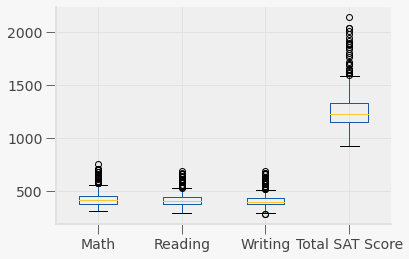

In [18]:
boxplot = df2.boxplot(column=["Math", "Reading", "Writing", "Total SAT Score" ]) 

In [19]:
df2.rename(columns={'Percent White': 'White', 'Percent Black': 'Black', 'Percent Hispanic': 'Hispanic', 'Percent Asian': 'Asian', }, inplace=True)

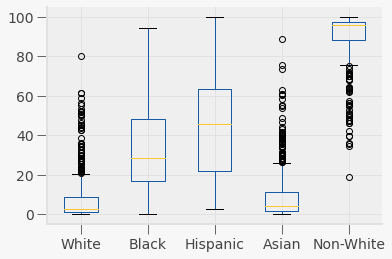

In [20]:
boxplot = df2.boxplot(column=["White", "Black", "Hispanic", "Asian", "Non-White"]) 

These boxplots shows us a simple visual representation of some our variables. From a casual overview, we see how on average students gets relatively higher points in the math section, and most average SAT scores in highschools are close to 1250 with a few outliers that go over 1700. Our second boxplot shows the ethnicity spread in all these boroughs. We can see how white and asian populations are very low on average while there is a clear dominanca of black and hispoanic population. This is a key insight since in our analysis later we will interpret whether belonging from a borough with a black/hispanic majority actually might be at a disadvantage when comes to obtaining SAT scores. 

For further visual representation between the different boroughs and SAT scores, we are going to develop a histogram that shows how our sample looks like. We see a positive skew towards the right tail of the histogram which indicates that most of the SAT scores lie close to the mean at 1250 while only a few highschools in these boroughs have extremely high scores. Our emphasis will be to see whether most boroughs with SAT scores close to or lower 1200 are from which ethinic group. 

<AxesSubplot:xlabel='Total SAT Score', ylabel='Count'>

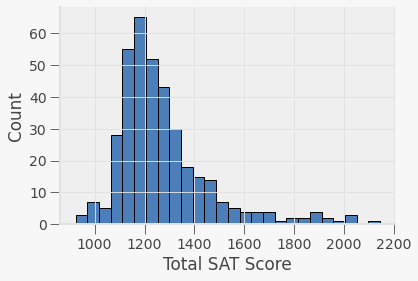

In [21]:
sns.histplot(df2['Total SAT Score'])

## Future Steps
With our initial anaylsis we see the spread of SAT scores, the distribution and statistics of SAT scores in each borough and the divide in ethinic groups. In future steps we will further find correlations between these variables and a develop more comprehensive and elaborative models that will help in answering our question. 

In [156]:
nyc = pd.read_csv(r'C:\Users\Anwar Malik\Downloads\nybb.csv')
nyc.head(5)

,BoroName,the_geom,BoroCode,Shape_Leng,Shape_Area
0,Manhattan,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,359993.127161,6.366208e+08
1,Bronx,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,463868.935588,1.187194e+09
2,Brooklyn,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,728195.194837,1.934174e+09
3,Staten Island,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,325924.002252,1.623631e+09
4,Queens,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,900269.281914,3.040206e+09


In [165]:
df5 = pd.DataFrame({
'Borough':['Queens', 'Manhattan','Brooklyn', 'Bronx', 'Staten Island'],
'Latitude': [40.711111, 40.753210, 40.652112, 40.853829, 40.578410],
'Longitude': [-73.820001, -73.997860, -73.98111, -73.906455,-74.250000] 
})
df5["Coordinates"] = list(zip(df5.Longitude, df5.Latitude))
df5["Coordinates"] = df5["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df5, geometry="Coordinates")
gdf.head()

,Borough,Latitude,Longitude,Coordinates
0,Queens,40.711111,-73.820001,POINT (-73.82000 40.71111)
1,Manhattan,40.753210,-73.997860,POINT (-73.99786 40.75321)
2,Brooklyn,40.652112,-73.981110,POINT (-73.98111 40.65211)
3,Bronx,40.853829,-73.906455,POINT (-73.90645 40.85383)
4,Staten Island,40.578410,-74.250000,POINT (-74.25000 40.57841)


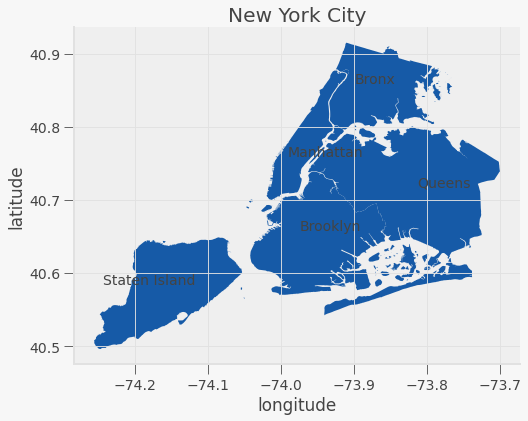

In [166]:
nyc['geom'] = nyc['the_geom'].apply(wkt.loads)

#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nyc = gpd.GeoDataFrame(nyc, geometry='geom')

fig,ax = plt.subplots(1,1, figsize=(8,8))
plt.title("New York City")
plt.xlabel('longitude')
plt.ylabel('latitude')
nyc.plot(ax=ax)


for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['Borough']):
    ax.annotate(label, xy=(x,y), xytext=(5,5), textcoords='offset points')